In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

breaths = pd.read_csv('breath_data.csv',sep='\t')
breaths['datetime'] = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S.%f') for i in breaths['datetime']]

exhales = [[],[],[],[],[],[]]
inhales = [[],[],[],[],[],[]]
periods = []
periodctr = 0

for i in range(len(breaths)-1):
    if breaths['period'][i] == breaths['period'][i+1]:
        diff = breaths['datetime'][i+1]-breaths['datetime'][i]
        diff = diff.seconds + diff.microseconds/1000000
        if breaths['type'][i]=='IN' and breaths['type'][i+1]=='OUT' and diff<5:
            inhales[periodctr].append(diff)
        elif breaths['type'][i+1]=='IN' and breaths['type'][i]=='OUT' and diff<5:
            exhales[periodctr].append(diff)
    else:
        periodctr+=1
        periods.append(breaths['period'][i])

periods.append(breaths['period'][len(breaths)-1])

times = pd.DataFrame(columns=['inhale','exhale','period'])
ctr = 0
for i in range(len(periods)):
    for j in range(min(len(inhales[i]),len(exhales[i]))):
        times.loc[ctr] = [inhales[i][j],exhales[i][j],periods[i]]
        ctr+=1

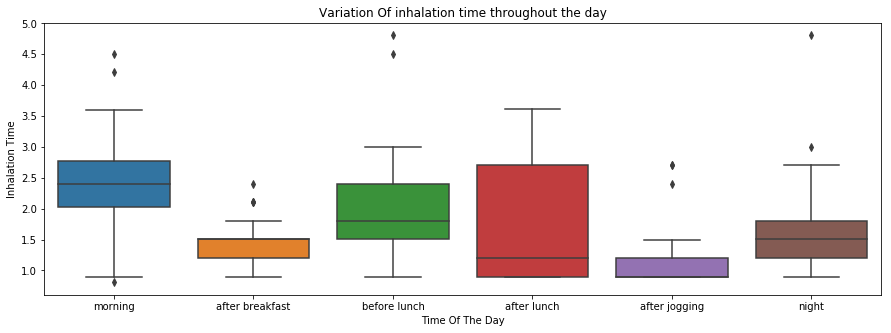

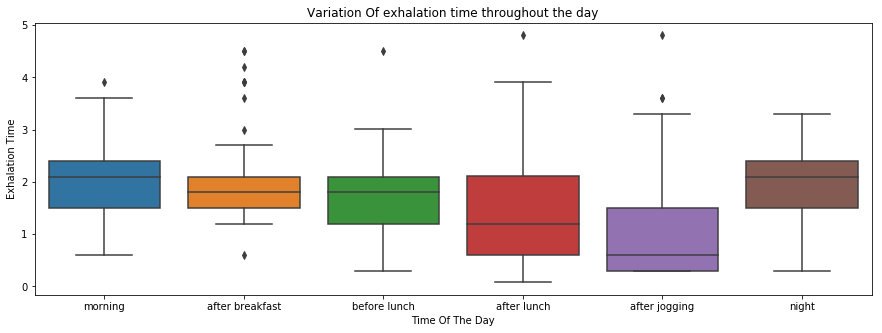

In [43]:
plt.figure(figsize = (15,5))
sns.boxplot(list(times.period),list(times.inhale))
plt.xlabel("Time Of The Day")
plt.ylabel("Inhalation Time")
plt.title("Variation Of inhalation time throughout the day")
plt.show()
plt.figure(figsize = (15,5))
sns.boxplot(list(times.period),list(times.exhale))
plt.xlabel("Time Of The Day")
plt.ylabel("Exhalation Time")
plt.title("Variation Of exhalation time throughout the day")
plt.show()